In [1]:
# Import packages as needed. Maybe PIL?
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import YAArrow
import matplotlib.ticker as mtick

import numpy as np

import textwrap

from astropy.io import ascii

In [52]:
# Just a litte function so we can graph the planets with proper relative sizes
# Output min and max are 5 and 40 respectively
def planetScaling(radius):
    return 35*(radius - 1150)/(68850) + 5

In [76]:
def angularSizeChart():

    # read in data from spread sheet
    filename = "./datatable.csv"
    datalist = ascii.read(filename, format='csv')
    
    
    area = np.pi * (9**2) 
    categoriesDict = {#'Telescopes':[1,{'s':200,'marker':'h','color':"#8d00c6",'alpha':0.5}],
                      'Solar System':[1,{'s':area,"alpha":0.75,'color':'#ab1203'}],
                      'Stars':[2,{'s':200,'marker':(8, 2, 45),'color':"#270584","alpha":0.75},
                               "Arrow",{'width':0.3,'frac':10**-11,'headwidth':0.3,'facecolor':"#a093c2",'alpha':0.25}],
                      'Galaxies':[3,{'s':200,'marker':(16, 2, 30),'color':"#0467ca","alpha":0.75},
                                "Arrow",{'width':0.3,'frac':10**-13,'headwidth':0.3,'facecolor':"#63a3e3",'alpha':0.25}],
                      'Extragalactic Objects':[4,{'s':200,'marker':(12, 2, 22.5),'color':"#005a03","alpha":0.75},
                                "Arrow",{'width':0.3,'frac':10**-12,'headwidth':0.3,'facecolor':"#68a56a",'alpha':0.25}]}
    
    # set up figure (hard coding more things that usual since the goal is "pretty" not reproducable)
    f, ax = plt.subplots(1,figsize=(18,12))
    f.set_facecolor('#fcf9f1')
    ax.set_axis_bgcolor('#fcf9f1')
    
    f.canvas.set_window_title("Angular Sizes")
    
    axisFont = {'fontname':'Georgia', 'size':'16'}
    titleFont = {'fontname':'Georgia', 'size':'24', 'weight':'bold'}
    annoteFont = {'fontname':'Georgia', 'size':'12'}
    
    ax.set_title("Angular Sizes",y=1.2,**titleFont)
    
    degree = '\u00b0'
    labels = ['0.0001 mas', '0.001 mas', '0.01 mas', '0.1 mas', '1 mas', 
              '10 mas', '0.1arcsec', '1arcsec', '10arcsec', '1.6arcmin','16arcmin', '2.8'+ degree]
    
    ax.set_xscale("log")
    ax.set_xlabel("Angular Size",**axisFont)
    ax.set_xlim(10**-7,10**5)
    ax.set_xticks([10**x for x in range(-7,5)])
    #ax.set_xticklabels(labels, **axisFont)
    ax.set_xticklabels(ax.get_xticks(), **axisFont)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
    
    ax.set_yscale("log")
    #ax.yaxis.grid(True)
    #ax.set_ylim(0, len(categoriesDict) + 1)
    ax.set_ylim(10**-3, 10**16)
    ax.set_yticks([10**x for x in range(-3,16)]) 
    ax.set_yticklabels(ax.get_yticks(), **axisFont)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
    ax.set_ylabel("Distance (AU)",**axisFont)
    
    # putting in references(on second axis for proper labeling)
    references = datalist[np.where(datalist['Category'] == 'Reference')]
    
    ax2 = ax.twiny()
    ax2.set_xscale("log")
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(references['Angular Scale (arcseconds)'])
    ax2.set_xticklabels([textwrap.fill(text,15) for text in references['Name']], rotation=65,**axisFont)
    for ref in references:
        ax.axvline(ref['Angular Scale (arcseconds)'],color='#9c9c9c',linewidth=2,linestyle='--')   
    
    # adding telescope info (STILL NEED TO LABEL)
    telescopes = datalist[np.where(datalist['Category'] == 'Telescopes')]
    for scope in telescopes:
        ax.axvline(scope['Angular Scale (arcseconds)'],color='#a277b8',linewidth=2)
    
    
    # Adding distance references
    distRef = datalist[np.where(datalist['Category'] == 'DistanceRef')]
    for ref in distRef:
        ax.axhline(ref['Distance (AU)'],color='#9c9c9c',linewidth=2,linestyle='--')
        ax.annotate(ref['NickName'], (1.5*10**-7,ref['Distance (AU)']),**annoteFont)
    
    
    # Adding the planets
    planets = datalist[np.where(datalist['Category'] == 'Planet')]
    for p in np.unique(planets['NickName']):
        aPlanet = planets[np.where(planets['NickName'] == p)]
        ax.plot(aPlanet['Angular Scale (arcseconds)'],aPlanet['Distance (AU)'],
                'o-',linewidth=3,alpha=.75,color="#ab1203",markersize=15)
        ax.annotate(aPlanet['NickName'][0], (aPlanet['Angular Scale (arcseconds)'][0],
                                             aPlanet['Distance (AU)'][0]),**annoteFont)
                                                    
    
    # putting in the rest of the data
    for cat in categoriesDict.keys():
        data = datalist[np.where(datalist['Category'] == cat)]
        ax.scatter(data['Angular Scale (arcseconds)'],data['Distance (AU)'],**categoriesDict[cat][1])
        for ob in data:
            ax.annotate(ob['NickName'], (ob['Angular Scale (arcseconds)'],
                                         ob['Distance (AU)']),**annoteFont)
        #if len(categoriesDict[cat]) >= 4:
        #    if categoriesDict[cat][2] == 'Arrow':
        #        ax.add_patch(YAArrow(f, (10**-7, categoriesDict[cat][0]), 
        #                            (np.max(data['Angular Scale (arcseconds)']),categoriesDict[cat][0]), 
        #                            **categoriesDict[cat][3]))
    
        
    plt.tight_layout()    
    plt.savefig('angularSize.pdf')
    plt.show()


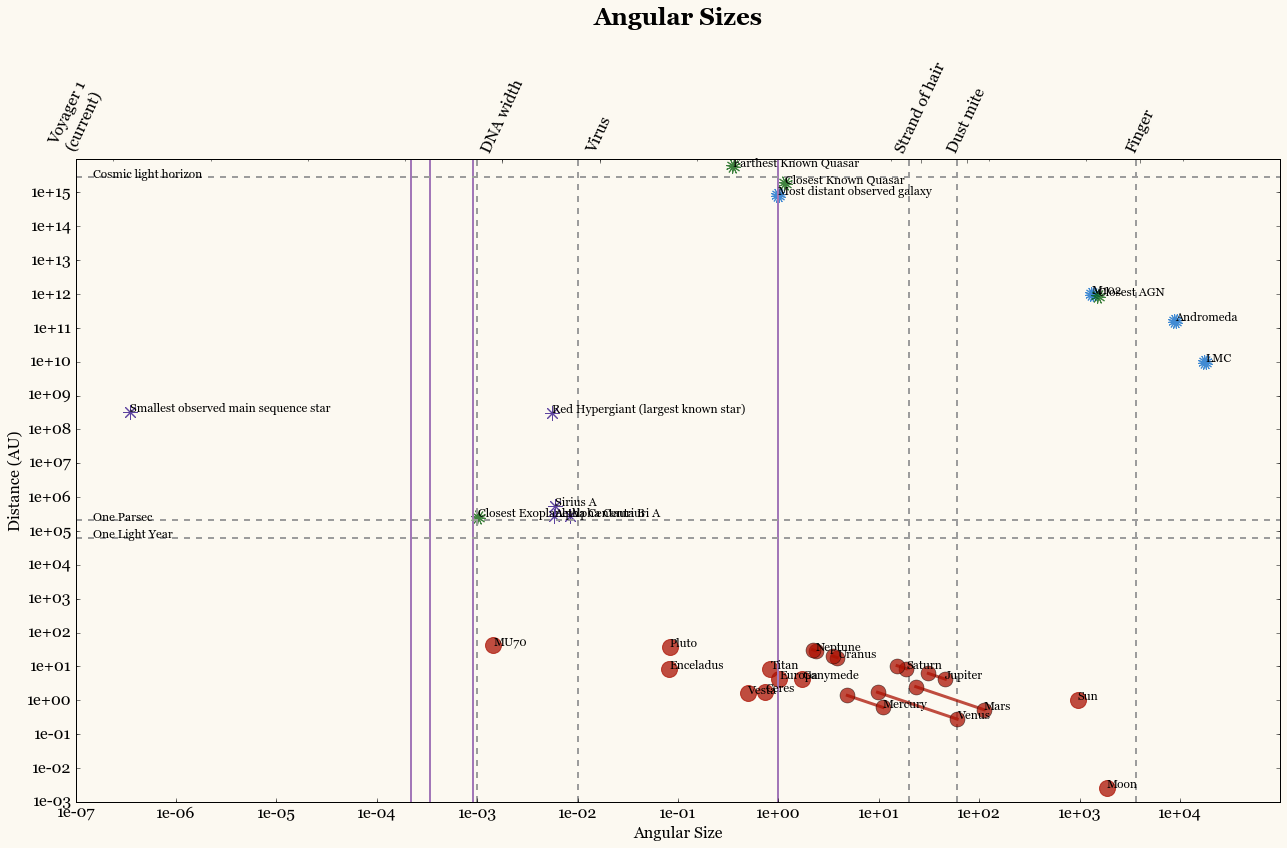

In [77]:
angularSizeChart()

In [4]:
filename = "./datatable.csv"
datalist = ascii.read(filename, format='csv')

In [5]:
datalist[datalist['Category'] == 'Stars']

Category,Name,NickName,Angular Scale (degrees),Angular Scale (arcseconds),Distance (AU),Size (km),Offset,Reference,Notes,col10
str21,str20,str36,float64,float64,float64,float64,float64,str20,str67,str152
Stars,Sirius A,Sirius A,1.65e-06,0.00594,540000.0,--,0.15,Kervalla et al. 2003,--,--
Stars,Alpha Centauri A,Alpha Centauri A,2.31e-06,0.00831,270000.0,--,-0.2,Kervalla et al. 2003,--,--
Stars,Alpha Centauri B,Alpha Centauri B,1.63e-06,0.00586,270000.0,--,-0.3,Kervalla et al. 2003,--,--
Stars,OGLE-TR-123b,Smallest observed main sequence star,9.69e-11,3.49e-07,330000000.0,83500.0,0.15,Pont et al,--,--
Stars,VY Canis Majoris,Red Hypergiant (largest known star),1.55e-06,0.00558,309000000.0,1250000000.0,0.15,Universe Today,--,--
